# Примеры использования базиса Грёбнера в sympy

In [1]:
import sympy as sym
from sympy import Poly,LC,LM, LT,init_printing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

init_printing()

In [2]:
from sympy.abc import x, y, z, t, u
var = [x, y, z]

## Порядок мономов


**Задача 1 из лекции**

Для многочена $3x_1+x_2^2x_3^4+x_4^7$ определить старший моном для трёх порядков: lex, grlex, grevlex и обратных к ним. 



In [3]:
x1,x2,x3,x4 = sym.symbols("x1 x2 x3 x4")
f = x4**7+3*x1+x2**2*x3**4
f
f.args

In [4]:
orderlst = ["lex","grlex","grevlex","ilex","igrlex","igrevlex"]
[LT(f,order=order) for order in orderlst]


**Задача 2**

Вывести список мономов многочлена в определённом лексикографическом порядке



In [5]:
# Функция выводит список мономов в заданном порядке
def SortOrder(f,varlst=(x,y,z),order="lex"):
    g = sym.Poly(f.as_expr(),varlst)
    monlst = []
    while g!=0:
        monlst.append(sym.LT(g,order=order))
        g-=monlst[-1]
    return (monlst)


In [6]:
f1 = sym.Poly(x**4+2*y**4+3*z**4-x*y*z+2*x**3*y**3-x*z+y**2*z**2-5,*var)
f1,f1.as_expr()
f2 = sym.Poly(4*x*y**2*z + 4*z**2 - 5*x**3 + 7*x**2*z**2,var)
f2.as_expr()

In [7]:
[(order,SortOrder(f1,var,order=order)) for order in orderlst]

[('lex', [x**4, 2*x**3*y**3, -x*y*z, -x*z, 2*y**4, y**2*z**2, 3*z**4, -5]),
 ('grlex', [2*x**3*y**3, x**4, 2*y**4, y**2*z**2, 3*z**4, -x*y*z, -x*z, -5]),
 ('grevlex', [2*x**3*y**3, x**4, 2*y**4, y**2*z**2, 3*z**4, -x*y*z, -x*z, -5]),
 ('ilex', [-5, 3*z**4, y**2*z**2, 2*y**4, -x*z, -x*y*z, 2*x**3*y**3, x**4]),
 ('igrlex', [-5, -x*z, -x*y*z, 3*z**4, y**2*z**2, 2*y**4, x**4, 2*x**3*y**3]),
 ('igrevlex',
  [-5, -x*z, -x*y*z, 3*z**4, y**2*z**2, 2*y**4, x**4, 2*x**3*y**3])]

In [8]:
[(order,SortOrder(f2,var,order=order)) for order in orderlst]

[('lex', [-5*x**3, 7*x**2*z**2, 4*x*y**2*z, 4*z**2]),
 ('grlex', [7*x**2*z**2, 4*x*y**2*z, -5*x**3, 4*z**2]),
 ('grevlex', [4*x*y**2*z, 7*x**2*z**2, -5*x**3, 4*z**2]),
 ('ilex', [4*z**2, 4*x*y**2*z, 7*x**2*z**2, -5*x**3]),
 ('igrlex', [4*z**2, -5*x**3, 4*x*y**2*z, 7*x**2*z**2]),
 ('igrevlex', [4*z**2, -5*x**3, 7*x**2*z**2, 4*x*y**2*z])]

## Принадлежность многочлена идеалу


**Задание 6 лекции**

Проверить, принадлежат ли идеалу $ I=\left\langle xz-y^2, x^3-z^2\right\rangle $ многочлены 
\begin{gather*}
		g_1=-4x^2y^2z^2+y^6+3z^5 \\
		g_2=xy-5z^2+x
\end{gather*}



In [9]:
# Задаём идеал и многочлены
J=[x*z-y**2,x**3-z**2]
J
g1 = -4*x**2*y**2*z**2+y**6+3*z**5
g1
g2=x*y-5*z**2+x
g2

Способы решения задачи

Вначале вычислить базис Грёбнера идеала, затем
1) либо применить метод $\texttt{contains()}$;
2) либо вычислить приведение многочлена по модулю идеала методом $\texttt{reduce()}$.

In [10]:
# Вычисляем базис Грёбнера относительно переменных x,y,z с заданным 
# лексикографическим порядком
GB_J = sym.groebner(J,*var,order="grlex")
GB_J,len(GB_J)

In [11]:
# First way
GB_J.contains(g1)
GB_J.contains(g2)

True

False

In [13]:
# Reduce polynomial on modulo ideal
Q,rem = sym.reduced(g1,GB_J)
# Результат деления 0 - принадлежит
(Q,rem)

In [16]:
# Выполним проверку, перемножив многочлены базиса на частные
sum([q*p for q,p in zip(GB_J,Q)]).expand()

In [17]:
sym.reduced(g2,GB_J)
# Здесь не принадлежит

## Критерий несовместности

In [18]:
# Пример несовместной системы
sys2 = [x**2+y**2-1, x*y+x*z+y*z-1, x+y+z-1, x*y*z-1]
sys2

In [19]:
GBlex_sys2 = sym.groebner(sys2,*var)
GBlex_sys2 # Решений нет, поскольку 1 входит в идеал

## Решение систем алгебраических уравнений

**Задание 7 лекции** 

Найти решение системы с помощью базиса Грёбнера
$$
\left\{
\begin{aligned}
{}&x^3+x^2y-xy-y^2=0,\\
{}&xy-x-y+1=0,\\
{}&x^2-y^2=0.
\end{aligned}
\right.
$$



In [20]:
sys1 = [x**3+x**2*y-x*y-y**2,x*y-x-y+1,x**2-y**2]

In [21]:
GBlex_sys1 = sym.groebner(sys1,y,x)
#GBgrlex_sys1 = sym.groebner(sys1,x,y,order="grevlex")
#sym.solve(GB_sys1)
GBlex_sys1#,GBgrlex_sys1



In [22]:
# Проверяем размерность идеала 
sym.is_zero_dimensional(sys1)

True

In [23]:
# Находим все решения
sym.solve_poly_system(GBlex_sys1)

### Вычисление особых точек алгебраической кривой $f(x,y)=0$

Для этого составляется система
$$
\left\{
\begin{aligned}
f(x,y)=&0,\\ 
\frac{\partial f}{\partial x}=&0,\\ 
\frac{\partial f}{\partial y}=&0.
\end{aligned}
\right.
$$
Затем для нее вычисляется идеал, определяется его размерность и находятся корни. Если многочлен факторизуется, то можно выполнить декомпозицию идеала.

**Пример**

Для демонстрации метода используется многочлен из примера к Лекции 1. 
Многочлен от трех переменных заменяется многочленом от переменных $y,z$.  

In [21]:
x,y,z = sym.symbols("x y z",real=True)
f_orig = 4 * x ** 5 * y - 4 * x ** 5 * z + 48 * x ** 4 * y ** 2 - 92 * x ** 4 * y * z + 40 * x ** 4 * z ** 2 + 344 * x ** 3 * y ** 3 - 904 * x ** 3 * y ** 2 * z + 736 * x ** 3 * y * z ** 2 - 192 * x ** 3 * z ** 3 + 1200 * x ** 2 * y ** 4 - 4376 * x ** 2 * y ** 3 * z + 5360 * x ** 2 * y ** 2 * z ** 2 - 2752 * x ** 2 * y * z ** 3 + 512 * x ** 2 * z ** 4 + 2500 * x * y ** 5 - 11700 * x * y ** 4 * z + 19168 * x * y ** 3 * z ** 2 - 14656 * x * y ** 2 * z ** 3 + 5376 * x * y * z ** 4 - 768 * x * z ** 5 - 7500 * y ** 5 * z + 21800 * y ** 4 * z ** 2 - 25408 * y ** 3 * z ** 3 + 14848 * y ** 2 * z ** 4 - 4352 * y * z ** 5 + 512 * z ** 6 + 2 * x ** 5 + 82 * x ** 4 * y - 64 * x ** 4 * z + 740 * x ** 3 * y ** 2 - 1152 * x ** 3 * y * z + 456 * x ** 3 * z ** 2 + 3156 * x ** 2 * y ** 3 - 6784 * x ** 2 * y ** 2 * z + 5144 * x ** 2 * y * z ** 2 - 1344 * x ** 2 * z ** 3 + 6490 * x * y ** 4 - 14464 * x * y ** 3 * z + 13816 * x * y ** 2 * z ** 2 - 6720 * x * y * z ** 3 + 1344 * x * z ** 4 + 20250 * y ** 5 - 45120 * y ** 4 * z + 37928 * y ** 3 * z ** 2 - 14976 * y ** 2 * z ** 3 + 2880 * y * z ** 4 - 256 * z ** 5 + 13 * x ** 4 + 412 * x ** 3 * y - 344 * x ** 3 * z + 2782 * x ** 2 * y ** 2 - 5176 * x ** 2 * y * z + 2200 * x ** 2 * z ** 2 + 828 * x * y ** 3 - 12936 * x * y ** 2 * z + 15888 * x * y * z ** 2 - 5088 * x * z ** 3 - 37827 * y ** 4 + 67608 * y ** 3 * z - 35496 * y ** 2 * z ** 2 + 2016 * y * z ** 3 + 1872 * z ** 4 + 64 * x ** 3 + 1728 * x ** 2 * y - 1152 * x ** 2 * z + 15552 * x * y ** 2 - 20736 * x * y * z + 6912 * x * z ** 2 + 46656 * y ** 3 - 93312 * y ** 2 * z + 62208 * y * z ** 2 - 13824 * z ** 3
f_x0 = f_orig.subs(x,0).factor()
f_x0

In [22]:
h = f_x0.args[2]
h_poly = Poly(h,(y,z))
h,h_poly

In [23]:
sysSP = [h,h.diff(y),h.diff(z)]
GBsysSP = sym.groebner(sysSP,z,y)

In [24]:
h_1D = [h_poly.diff((0,1)),h_poly.diff((1,1))]
h_2D = [h_poly.diff((0,2)),h_poly.diff((0,1),(1,1)),h_poly.diff((1,2))]

In [25]:
GBsysSP.is_zero_dimensional,len(GBsysSP)

(True, 2)

In [26]:
GBsysSP[-1].factor()

In [27]:
_,fctr_lst = sym.factor_list(GBsysSP[1].factor())
fctr_lst

In [28]:
GBsysSPA = sym.groebner(sysSP+[fctr_lst[0][0]],z,y)
GBsysSPB = sym.groebner(sysSP+[fctr_lst[1][0]],z,y)
GBsysSPC = sym.groebner(sysSP+[fctr_lst[2][0]],z,y)

In [29]:
GBsysSPA
Sol_SPA = sym.solve(GBsysSPA)
Sol_SPA

In [30]:
GBsysSPB
Sol_SPB = sym.solve(GBsysSPB)
Sol_SPB

In [31]:
GBsysSPC

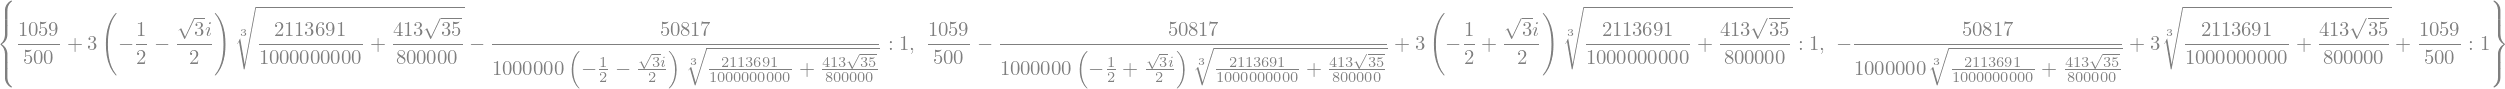

In [32]:
SPC_roots_y = sym.roots(GBsysSPC[-1],y)
SPC_roots_y

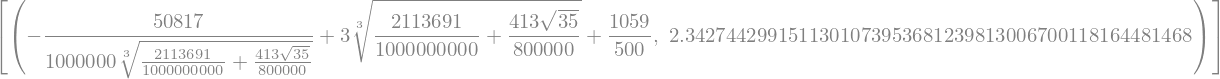

In [33]:
[(r,sym.N(r,50)) for r in SPC_roots_y if r.is_real]

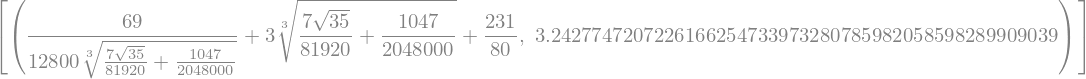

In [34]:
SPC_roots_z=sym.roots(sym.groebner(GBsysSPC,y,z)[-1],z)
[(r,sym.N(r,50)) for r in SPC_roots_z if r.is_real]

## Исследование поверхности, заданной параметрически

**Задание 8**

Найти неявное задание поверхности, заданной параметрически. Исследовать её особенности.
\begin{equation*}%\label{key}
	\begin{aligned}
	x&=t+u,\\
	y&=t^2+2tu,\\
	z&=t^3+3t^2u.
	\end{aligned}
\end{equation*}



In [24]:
# Записываем систему
Surf_sys = [sym.Eq(x,t+u),sym.Eq(y,t**2+2*t*u),sym.Eq(z,t**3+3*t**2*u)]
Surf_sys

In [25]:
# Составляем идеал
Surf_param = [eq.lhs-eq.rhs for eq in Surf_sys]
Surf_param
varlst = [t,u,x,y,z]

In [26]:
# Вычисляем его базис Грёбнера для соответствующего порядка
GB_Surf = sym.groebner(Surf_param,*varlst)
# Последний элемент базиса и есть неявное представление поверхности
Surf = GB_Surf[-1]
Surf

In [27]:
# Составляем систему из уравнения поверхности и её частных производных
Sys_Surf = [Surf] + [Surf.diff(v) for v in varlst[2:]]
Sys_Surf

In [28]:
# Проверяем размерность решений
sym.is_zero_dimensional(Sys_Surf)
# Идеал не нульмерный

False

In [29]:
# Подбираем такой порядок переменных, чтобы идеал был попроще
GB_Sys_Surf = sym.groebner(Sys_Surf,z,y,x)
GB_Sys_Surf

In [30]:
#sym.factor(GB_Sys_Surf[-1])
Sol_yz=sym.solve_poly_system(GB_Sys_Surf,[y,z])
Sol_yz

In [31]:
Subs_yz = dict([(v,sol) for v,sol in zip([y,z],Sol_yz[0])])
Subs_yz

In [32]:
# Проверяем подстановкой
[eq.subs(Subs_yz) for eq in Sys_Surf]

Изображение поверхности ![](Df3anim.gif)

Здесь используется пакет sympy_plot_backends:https://sympy-plot-backends.readthedocs.io/en/latest/install.html
Подробности установки соответствующих графических backends описаны в документации к пакету.

In [33]:
from sympy.plotting import plot3d_parametric_surface, plot3d_parametric_line
# После установки пакета sympy_plot_backends
from spb import *

In [34]:
# Правые части параметризации поверхности
Surf = [eq.rhs for eq in Surf_sys]

In [35]:
# Кривая особых точек получается при значении параметра u=0
Curve = [eq.rhs.subs(u,0) for eq in Surf_sys]

In [44]:
# Здесь используем backend пакета plotly
#import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = 3,3
P_Surf = plot3d_parametric_surface(*Surf,(t,-1,1),(u,-2,2),backend=PB,label="Surface", aspect="equal")

In [45]:
P_Curve = plot3d_parametric_line(*Curve,(t,-2,2),backend=PB,use_cm=False,line_color="red",label="Curve",show=False)

In [46]:
(P_Surf+P_Curve).show()

In [47]:
# Построим поверхность 
import numpy as np

vSurf = [sym.lambdify([t,u],eq.rhs,"numpy") for eq in Surf_sys]

tmin,tmax = -1.,1.
umin,umax = -2,2
tdiap=np.linspace(tmin,tmax,100)
udiap=np.linspace(umin,umax,100)
tval,uval=np.meshgrid(tdiap,udiap)
X,Y,Z=vSurf[0](tval,uval),vSurf[1](tval,uval),vSurf[2](tval,uval)
tdiap2=np.linspace(2*tmin,2*tmax,100)
Xcrit,Ycrit,Zcrit = (vSurf[j](tdiap2,0) for j in range(3))

<Axes3D: >

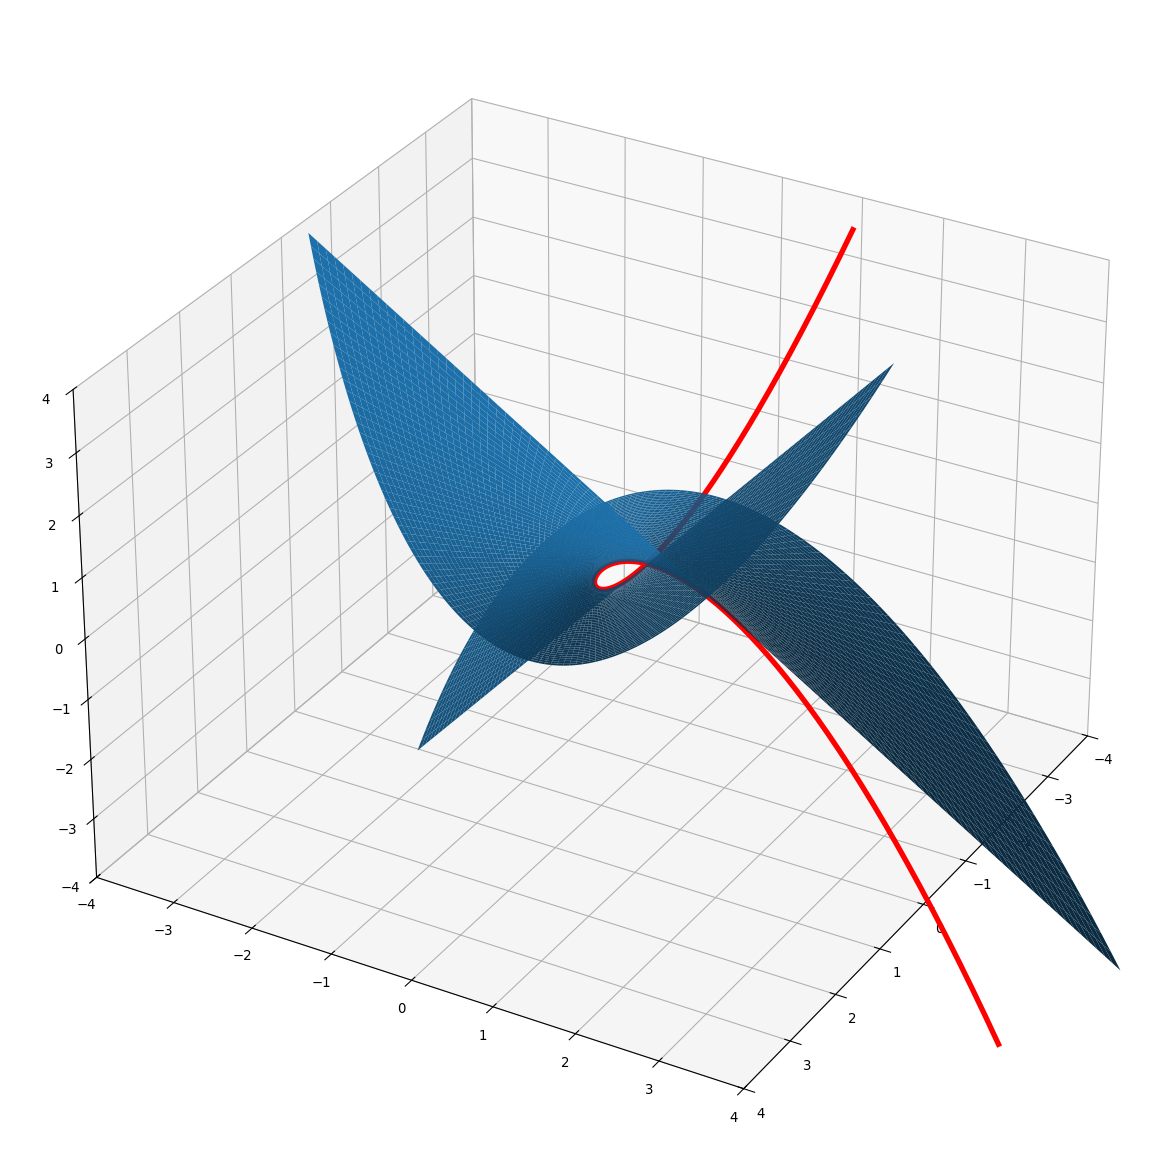

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
InteractiveShell.ast_node_interactivity = "last"
fig=plt.figure(figsize=(6,6),dpi=96)
ax=Axes3D(fig,rect=(-3,-3,2,2),azim=30,elev=30,proj_type="persp",clip_on=True,auto_add_to_figure=False)
fig.add_axes(ax)
#ax.elev,ax.azim=30,30
ax.set_xlim3d(-4,4)
ax.set_ylim3d(-4,4)
ax.set_zlim3d(-4,4)
ax.plot_surface(X,Y,Z,rstride=1,cstride=1)
ax.plot(Xcrit,Ycrit,Zcrit,"r-",linewidth=4)
plt.show()